In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


**Importing essential libraries for data manipulation and analysis**

In [2]:
import numpy as np
import pandas as pd

**Importing libraries for data visualization**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

**Suppressing warnings for clean output**

In [4]:
import warnings
warnings.simplefilter("ignore")

**Importing libraries for machine learning and model evaluation**

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Importing specific machine learning models**

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [7]:
df=pd.read_csv("/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Understanding

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**In our data there are 13 columns and  8 of them are object dtype and 4 of them are float dtype and 1 is int dtype  **

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
df["Loan_ID"].nunique()

614

In [12]:
df.drop(columns="Loan_ID",inplace=True,axis=1)

**i am dropping id column because it is not that important for my analysis**

**Now i will study all columns uniques values and total counts**

In [13]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
df["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [15]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [17]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [18]:
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [19]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
df["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [21]:
df["ApplicantIncome"].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [22]:
df["CoapplicantIncome"].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [23]:
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [24]:
df["LoanAmount"].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [25]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [26]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [27]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [28]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [29]:
df["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [30]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [31]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [32]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [33]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [34]:
continous=['ApplicantIncome','CoapplicantIncome','LoanAmount']
discrete_category=['Gender', 'Married', 'Education', 'Self_Employed', 
                   'Loan_Status', 'Credit_History', 'Property_Area']
discrete_count=['Dependents','Loan_Amount_Term']

In [35]:
df[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


# Data Visualization

**For Continous Columns**

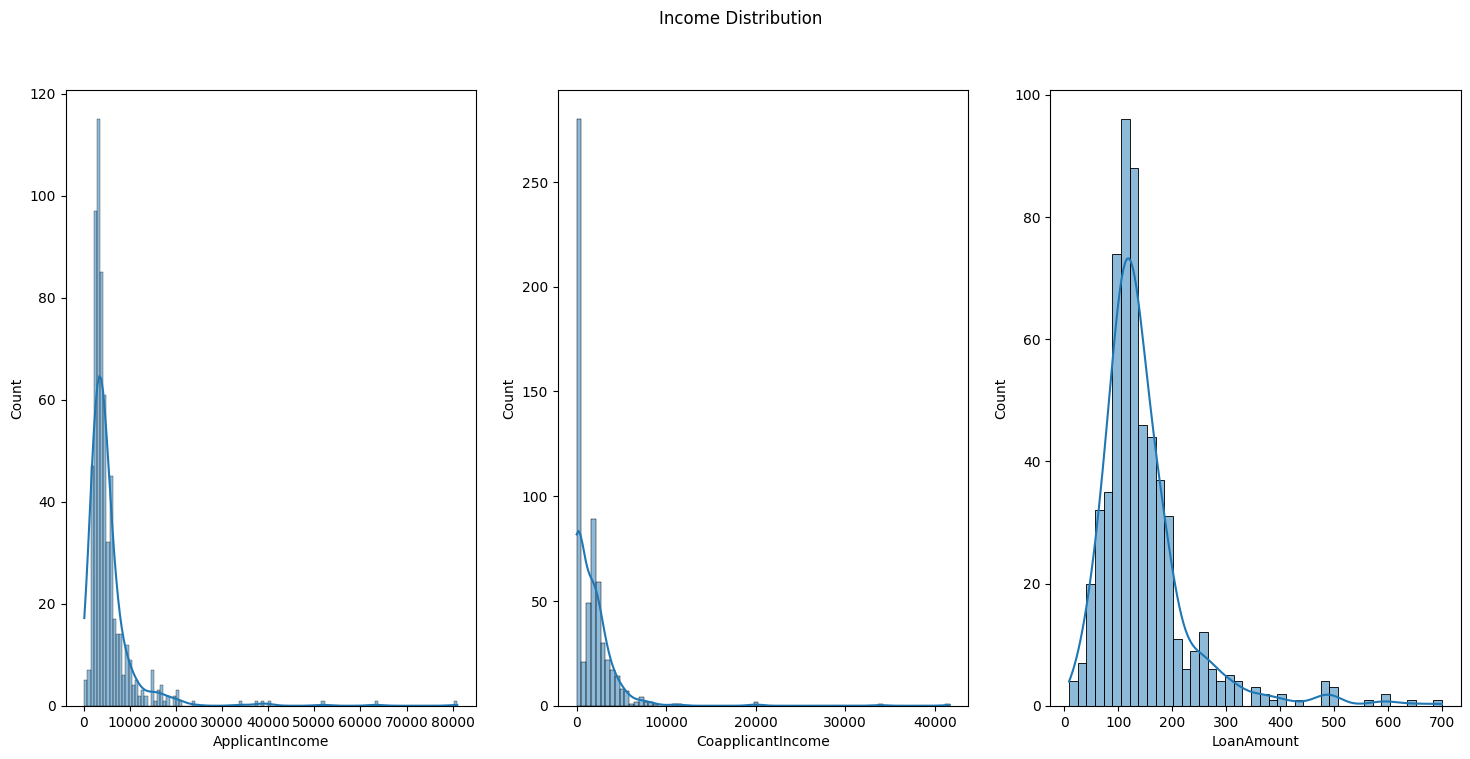

In [36]:
plt.rcParams["figure.figsize"] = (18, 8)

plt.subplot(1, 3, 1)
sns.histplot(df["ApplicantIncome"], kde=True)

plt.subplot(1, 3, 2)
sns.histplot(df["CoapplicantIncome"], kde=True)

plt.subplot(1, 3, 3)
sns.histplot(df["LoanAmount"], kde=True)

plt.suptitle('Income Distribution')
plt.show()

In [37]:
df[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

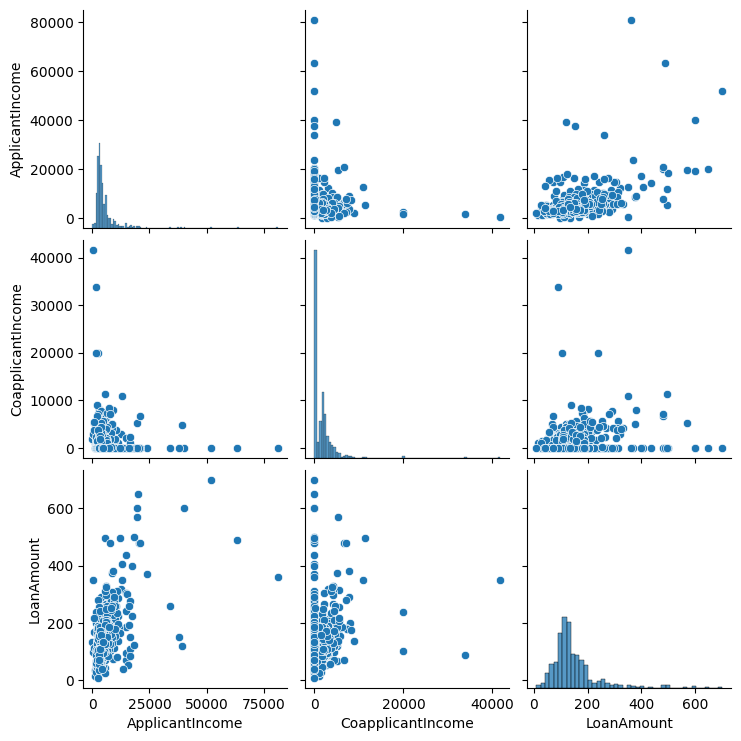

In [38]:
sns.pairplot(df[continous])
plt.show()

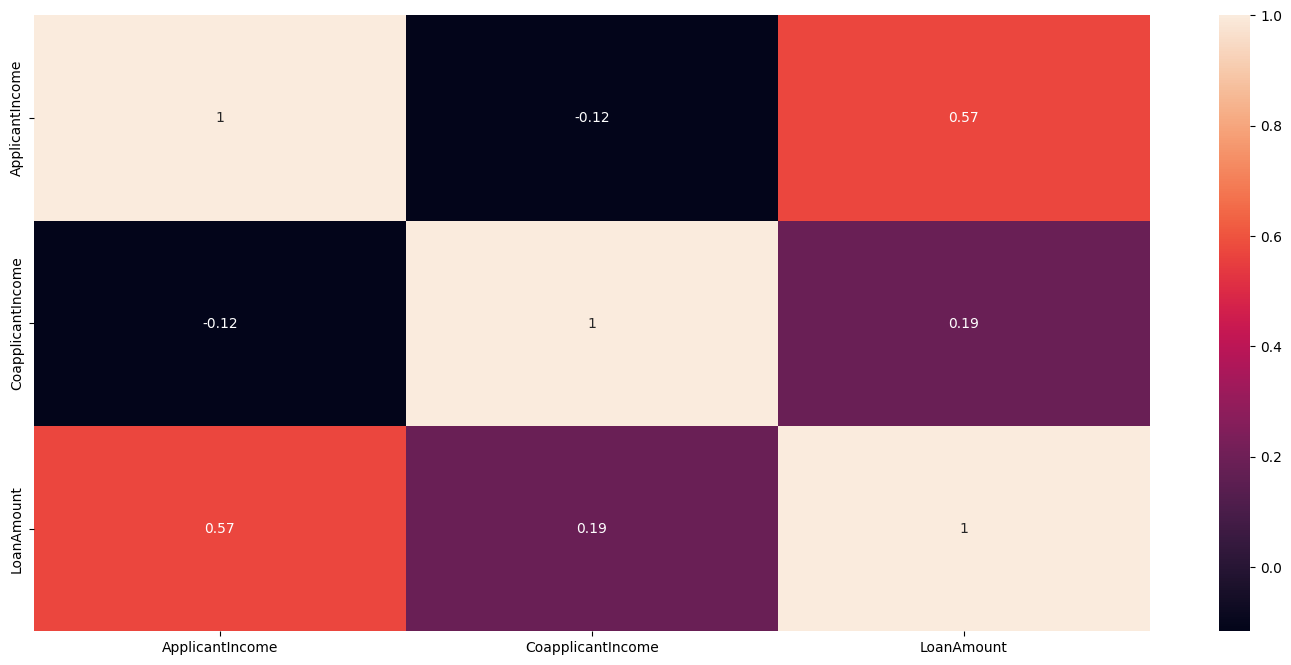

In [39]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

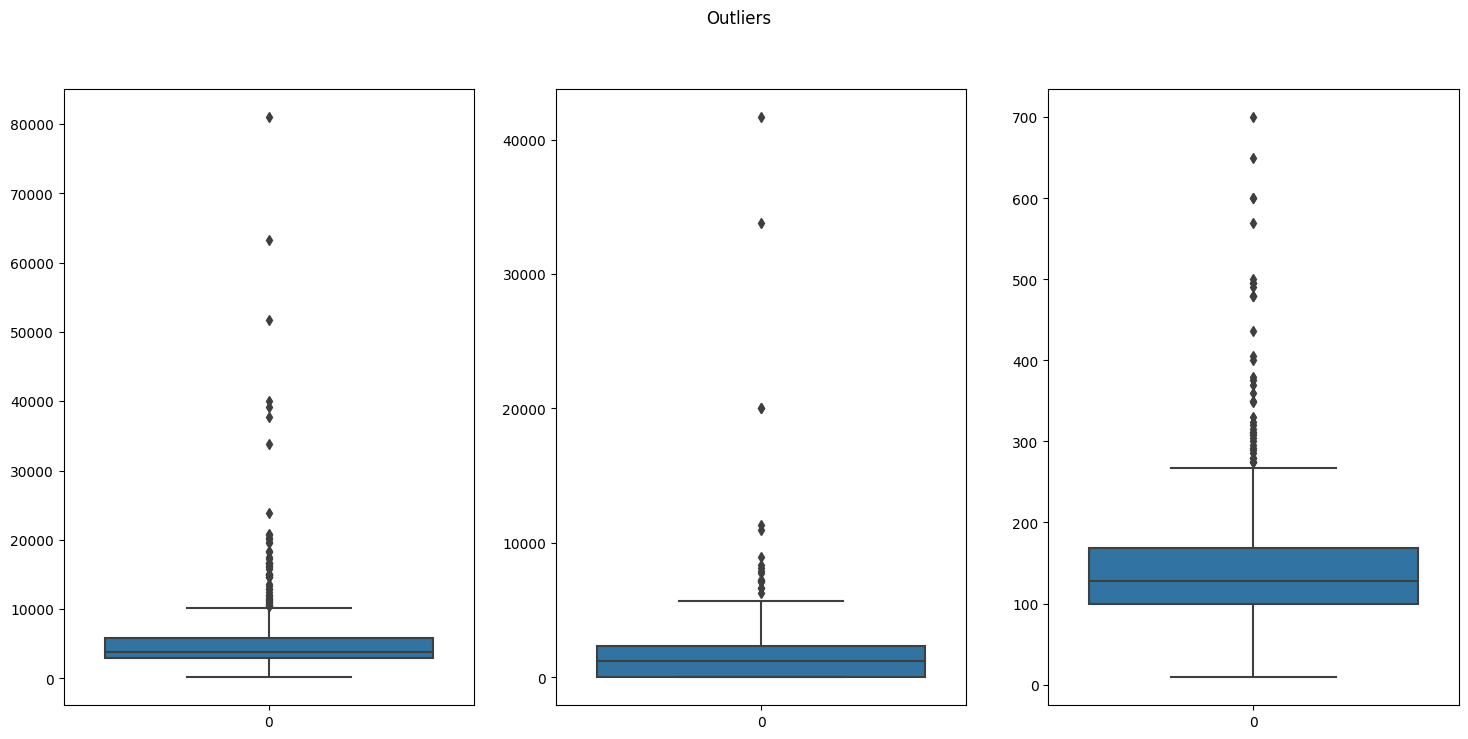

In [40]:
plt.subplot(1,3,1)
sns.boxplot(df["ApplicantIncome"])

plt.subplot(1,3,2)
sns.boxplot(df["CoapplicantIncome"])

plt.subplot(1,3,3)
sns.boxplot(df["LoanAmount"])

plt.suptitle("Outliers")
plt.show()

In [41]:
df[discrete_category]

,Gender,Married,Education,Self_Employed,Loan_Status,Credit_History,Property_Area
0,Male,No,Graduate,No,Y,1.0,Urban
1,Male,Yes,Graduate,No,N,1.0,Rural
2,Male,Yes,Graduate,Yes,Y,1.0,Urban
3,Male,Yes,Not Graduate,No,Y,1.0,Urban
4,Male,No,Graduate,No,Y,1.0,Urban
...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,Y,1.0,Rural
610,Male,Yes,Graduate,No,Y,1.0,Rural
611,Male,Yes,Graduate,No,Y,1.0,Urban
612,Male,Yes,Graduate,No,Y,1.0,Urban


**For Discrete Columns**

# Data Preprocessing

In [42]:
df["Income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

In [43]:
df.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

**Modifying wrong data**

In [44]:
df["Dependents"]=df["Dependents"].replace({"3+":3})

In [45]:
df.isna().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

**Encoding**

In [46]:
df=df.dropna(subset=["Income","LoanAmount","Loan_Amount_Term","Credit_History","Self_Employed"])

In [47]:
df["Dependents"]=df["Dependents"].fillna(0)

In [48]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [49]:
df.isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

**All the null values are removed**

In [50]:
df = df.dropna(subset=["Gender","Married","Education","Self_Employed","Loan_Status","Credit_History","Property_Area","Loan_Amount_Term","Dependents"])

In [51]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0}).astype("int")

df["Married"]=df["Married"].map({"Yes":1,"No":0}).astype("int")

df["Education"]=df["Education"].map({"Graduate":1,"Not Graduate":0}).astype("int")

df["Self_Employed"]=df["Self_Employed"].map({"No":0,"Yes":1}).astype("int")

df["Property_Area"]=df["Property_Area"].map({"Rural":0,"Semiurban":1,"Urban":2}).astype("int")

df["Loan_Status"]=df["Loan_Status"].map({"Y":1,"N":0}).astype("int")

**Now data type conversion of discrete_count variable**

In [52]:
df["Dependents"]=df["Dependents"].astype("int")
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].astype("int")

**Defining X andY**

In [53]:
x=df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',]]
y=df["Loan_Status"]

**Finding best random state**

In [54]:
train=[]
test=[]
cv=[]
for i in range(1,50):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    l=LogisticRegression()
    l.fit(x_train,y_train)
    ŷ_train=l.predict(x_train)
    ŷ_test=l.predict(x_test)
    from sklearn.metrics import accuracy_score
    train.append(accuracy_score(y_train,ŷ_train))
    test.append(accuracy_score(y_test,ŷ_test))
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(l,x_train,y_train,cv=5,scoring="accuracy").mean())
df1=pd.DataFrame({"train":train,"test":test,"cv":cv})
df2=df1[(abs(df1["train"]-df1["test"])<=0.05) & (abs(df1["test"]-df1["cv"])<=0.05)]
df3=df2[df2["cv"]==df2["cv"].max()].index.to_list()[0]
print("best random state",df3)

best random state 35


**Train_Test_Split**

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=35)

# Logistic Regression

**Modelling & Evaluation**

In [56]:
l_model=LogisticRegression()
l_model.fit(x_train,y_train)

ŷ_train=l_model.predict(x_train)
ŷ_test=l_model.predict(x_test)

print("CV",cross_val_score(l_model,x_train,y_train,cv=5,scoring="accuracy").mean())
print("train accuracy",accuracy_score(y_train,ŷ_train))
print("test accuracy",accuracy_score(y_test,ŷ_test))

CV 0.8165123456790123
train accuracy 0.8213399503722084
test accuracy 0.7821782178217822


# KNN

**Hyper parameter tuning**

In [57]:
estimator=KNeighborsClassifier()
param_grid={"n_neighbors":list(range(1,50))}

cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 25}

**Modelling & Evaluation**

In [58]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

ŷ_train=knn_model.predict(x_train)
ŷ_test=knn_model.predict(x_test)

print("CV",cross_val_score(knn_model,x_train,y_train,cv=5).mean())
print("train accuracy",accuracy_score(y_train,ŷ_train))
print("test accuracy",accuracy_score(y_test,ŷ_test))

CV 0.6450925925925926
train accuracy 0.7568238213399504
test accuracy 0.5841584158415841


# SVM

**Hyper parameter tuning**

In [59]:
estimator=SVC()
param_grid={"C":[1,3,5,7,9],"kernel":["linear","polynomial","rbf","sigmoid"]}
model1=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model1.fit(x_train,y_train)
model1.best_params_

{'C': 1, 'kernel': 'linear'}

**Modelling & Evaluation**

In [60]:
svm=SVC(C=1,kernel="linear")
svm.fit(x_train,y_train)

ŷ_train=svm.predict(x_train)
ŷ_test=svm.predict(x_test)
print("train accuracy",accuracy_score(y_train,ŷ_train))
print("test accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(svm,x_train,y_train,cv=5,scoring="accuracy").mean())

train accuracy 0.8163771712158809
test accuracy 0.7920792079207921
CV 0.8165123456790123


# Decision Tree

**Hyper parameter tuning**

In [61]:
estimator=DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy']}
model=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
model.fit(x_train,y_train)
model.best_params_

{'criterion': 'entropy'}

**Modelling & Evaluation**

In [62]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)

train_pred=dt.predict(x_train)
test_pred=dt.predict(x_test)

print('Train Accuracy:',accuracy_score(y_train,train_pred))
print('Test Accuracy:',accuracy_score(y_test,test_pred))

print('CV score:',cross_val_score(dt,x_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.9975186104218362
Test Accuracy: 0.6237623762376238
CV score: 0.7047839506172839


# Random Forest

**Hyper parameter tuning**

In [63]:
estimator=RandomForestClassifier(random_state=42)
param_grid={"n_estimators":list(range(1,50))}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

{'n_estimators': 7}

**Modelling & Evaluation**

In [64]:
rf=RandomForestClassifier(n_estimators=7)
rf.fit(x_train,y_train)

ŷ_train=rf.predict(x_train)
ŷ_test=rf.predict(x_test)


print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(rf,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.9627791563275434
test_accuracy 0.7326732673267327
CV 0.7791358024691357


# Ada Boost Classifier

**Hyper parameter tuning**

In [65]:
estimator=AdaBoostClassifier(random_state=42)
param_grid={"n_estimators":list(range(1,50))}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

{'n_estimators': 19}

**Modelling & Evaluation**

In [66]:
ab=AdaBoostClassifier(n_estimators=19)
ab.fit(x_train,y_train)

ŷ_train=ab.predict(x_train)
ŷ_test=ab.predict(x_test)


print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(ab,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.8387096774193549
test_accuracy 0.7722772277227723
CV 0.8239197530864197


# Gradient boost classifier

**Hyper parameter tuning**

In [67]:
estimator=GradientBoostingClassifier(random_state=42)
param_grid={"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.4,0.5]}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

{'learning_rate': 0.2, 'n_estimators': 6}

**Modelling & Evaluation**

In [68]:
gb=GradientBoostingClassifier(n_estimators=6,learning_rate=0.2)
gb.fit(x_train,y_train)

ŷ_train=gb.predict(x_train)
ŷ_test=gb.predict(x_test)


print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(gb,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.8337468982630273
test_accuracy 0.7524752475247525
CV 0.8188888888888888


# XG Boost Classifier

**Hyper parameter tuning**

In [69]:
estimator=XGBClassifier(random_state=7)
param_grid={"n_estimators":[10,20,40,60],"Max_depth":[3,4,5],"gamma":[0,0.15,0.30,0.45,1]}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

{'Max_depth': 3, 'gamma': 1, 'n_estimators': 10}

**Modelling & Evaluation**

In [70]:
xgb=XGBClassifier(max_depth=3,gamma=1,n_estimators=10)
xgb.fit(x_train,y_train)

ŷ_train=xgb.predict(x_train)
ŷ_test=xgb.predict(x_test)


print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(xgb,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.8163771712158809
test_accuracy 0.7920792079207921
CV 0.8115123456790124


**Confusion matrix**

In [71]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[16, 20],
       [ 1, 64]])

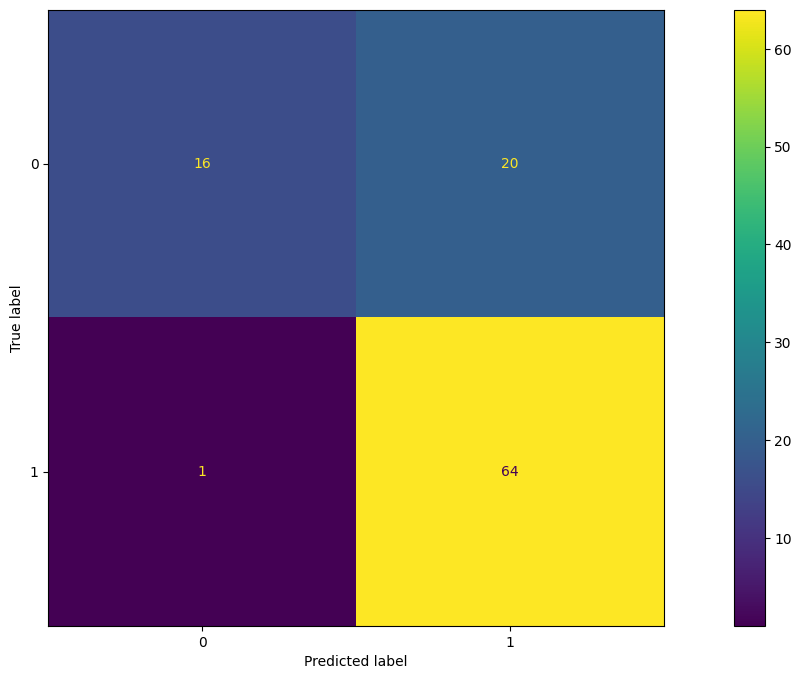

In [72]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [73]:
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.94      0.44      0.60        36
           1       0.76      0.98      0.86        65

    accuracy                           0.79       101
   macro avg       0.85      0.71      0.73       101
weighted avg       0.83      0.79      0.77       101



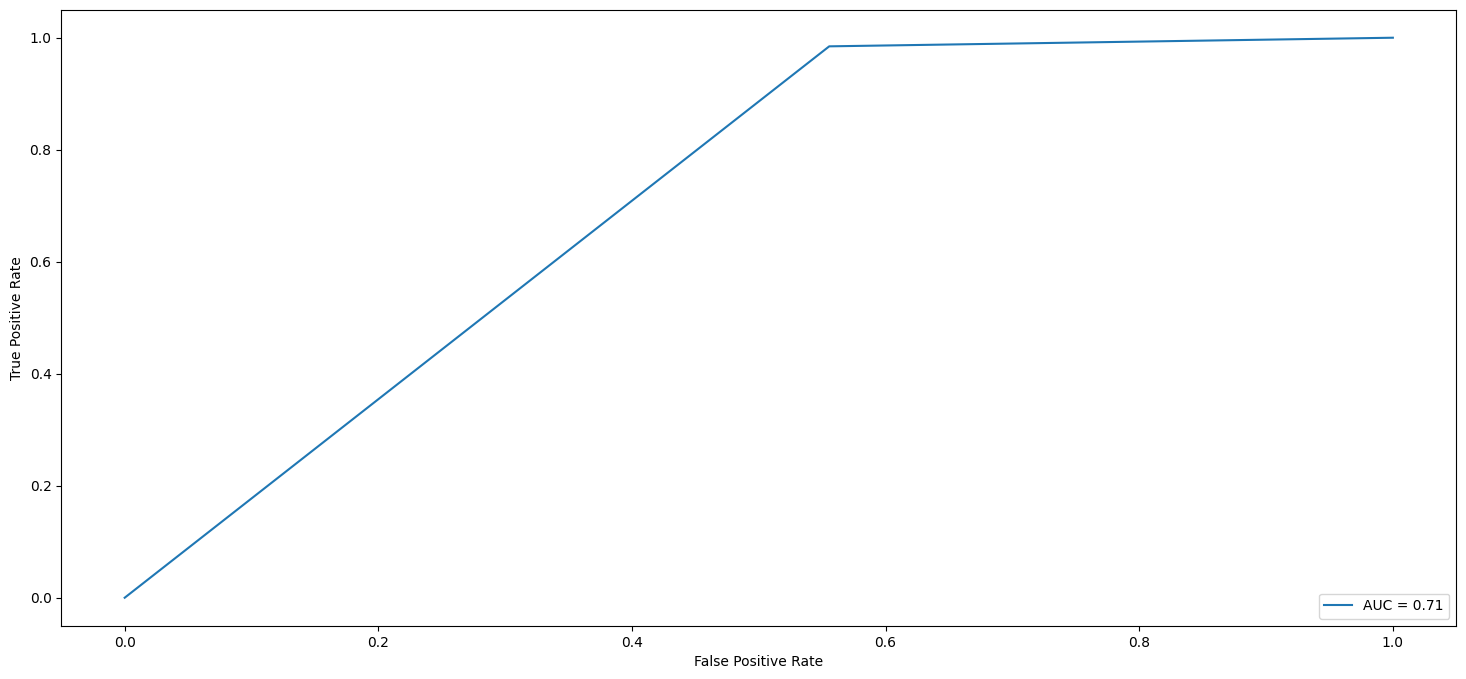

In [74]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr,tpr,thresholds=roc_curve(y_test,ŷ_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

**Ada Boost is best model**

# If you found this code helpful or interesting, please give it a like! Your support motivates me to share more valuable content. Have any questions, feedback, or suggestions? I'd love to hear from you! Drop a comment below. Thankyou!